## What is Image Classification?

Image Classification is the process of assigning a label or class to an image. In image classification, images are expected to have only one label or class, hence when a prediction is done on an image, the model returns a prediction about which class the image has the highest similarity toward.

**Advantages:**

*   Images can only be classified according to the classes available.


**Disadvantages:**

*   Very costly time and processing respectively.
*   Requires a labelled dataset and have it large enough for effective training.
*   Gathering data to create a dataset can be difficult and time consuming.


## Why the Data Set is Appropriate?

**Dataset by JORDAN J. BIRD** - https://www.kaggle.com/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/data


The dataset used for this task is appropriate, reasons being:

*   The number of images used exceeds the required amount of 100000 images.
*   The dataset comprises of two labelled groups of images, one being Fake/ AI-Generated images and Real images.

## Analysis to be done:

The Analysis process will be done as followed:

* Downloading and assigning of the data.
* The splitting of the data into training and testing datasets.
* The creation of the Sequential model used for image classification.
* Evaluation of the model and the analysis of the confusion matrix.

## Kaggle API Implementation Code for Easy downloading of the Dataset

In [ ]:
# Installing Kaggle API
#!pip install -q kaggle

In [ ]:
# Uploading Kaggle.json file
#from google.colab import files
#files.upload()

In [ ]:
# Creating Kaggle folder
#! mkdir ~/.kaggle

In [ ]:
# Copying Kaggle.json to kaggle folder
#! cp kaggle.json ~/.kaggle/

In [ ]:
# Permission for json to act
#! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Testing if kaggle API is working
#! kaggle datasets list

In [ ]:
# Code to download the dataset using kaggle API

# Link to dataset - https://www.kaggle.com/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/data

#!kaggle datasets download -d birdy654/cifake-real-and-ai-generated-synthetic-images

In [ ]:
#!unzip cifake-real-and-ai-generated-synthetic-images.zip

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

from keras.utils import plot_model
from IPython.display import Image

import cv2

## Assigning the testing and training image path directories

In [ ]:
train_img_path = '/content/train'
test_img_path = '/content/test'

In [ ]:
# # Ensuring dataset of 32px for the images
width = 32
height = 32
batch_size = 32

# Scaling the images
train_data_gen = ImageDataGenerator(rescale = 1.0/255)
test_data_gen = ImageDataGenerator(rescale = 1.0/255)

train_Dataset = train_data_gen.flow_from_directory(
    train_img_path,
    seed=404,
    target_size = (width,height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

test_Dataset = test_data_gen.flow_from_directory(
    test_img_path,
    seed=404,
    target_size = (width,height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = False
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('IDG',ImageDataGenerator()),
    ('train',train_data_gen.flow_from_directory),
    ('test',test_data_gen.flow_from_directory)
])

In [ ]:
train_Class = train_Dataset.class_indices
train_Shape = train_Dataset.image_shape

In [ ]:
test_Class = test_Dataset.class_indices
test_Shape = test_Dataset.image_shape

In [ ]:
print('Training Classes: ', train_Class)
print('Training Image Shape: ', train_Shape)

Training Classes:  {'FAKE': 0, 'REAL': 1}
Training Image Shape:  (32, 32, 3)


In [ ]:
print('Testing Classes: ', test_Class)
print('Testing Image Shape: ', test_Shape)

Testing Classes:  {'FAKE': 0, 'REAL': 1}
Testing Image Shape:  (32, 32, 3)


## Creation of the model

In [ ]:
# Creating Model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print a nodel summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 2, 2, 128)        

In [ ]:
# Save best model
weight_path = '/kaggle/working/'

model_checkpoint = ModelCheckpoint(
    filepath = weight_path,
    save_best_only = True,
    save_weights_only = True,
    mode = 'max',
    monitor = 'val_accuracy'
)

## Training and Running Epochs

In [ ]:
# Epoch iterations
epochs = 10
history = model.fit(train_Dataset,
                    epochs=epochs,
                    validation_data=test_Dataset,
                    callbacks=[model_checkpoint]
                   )

Epoch 1/10
3125/3125 [==============================] - 120s 38ms/step - loss: 0.3384 - accuracy: 0.8511 - val_loss: 0.2706 - val_accuracy: 0.8844
Epoch 2/10
3125/3125 [==============================] - 114s 36ms/step - loss: 0.2364 - accuracy: 0.9051 - val_loss: 0.2124 - val_accuracy: 0.9129
Epoch 3/10
3125/3125 [==============================] - 115s 37ms/step - loss: 0.2024 - accuracy: 0.9198 - val_loss: 0.1927 - val_accuracy: 0.9229
Epoch 4/10
3125/3125 [==============================] - 116s 37ms/step - loss: 0.1808 - accuracy: 0.9296 - val_loss: 0.1919 - val_accuracy: 0.9237
Epoch 5/10
3125/3125 [==============================] - 113s 36ms/step - loss: 0.1672 - accuracy: 0.9343 - val_loss: 0.1824 - val_accuracy: 0.9276
Epoch 6/10
3125/3125 [==============================] - 115s 37ms/step - loss: 0.1537 - accuracy: 0.9397 - val_loss: 0.2036 - val_accuracy: 0.9201
Epoch 7/10
3125/3125 [==============================] - 115s 37ms/step - loss: 0.1415 - accuracy: 0.9452 - val_loss: 0

## Displaying Training and Validation Accuracy:

Displays the accuracy of the model based on the training and validation datasets, in this graph the higher the value the better, however it is important to not view an instance where the training accuracy is far greater than the validation accuracy, otherwise overfitting is present within the model.

The choice to keep 10 was decided for after evaluation no change in performance is noted, hence the 10 helps show the training and validation accuracy path which was taken using training, where by the validation accuracy shows two instnaces where it decreases, with then a later increase, these instances occured after the 3 epoch.

Text(0.5, 1.0, 'Training and Validation Accuracy')

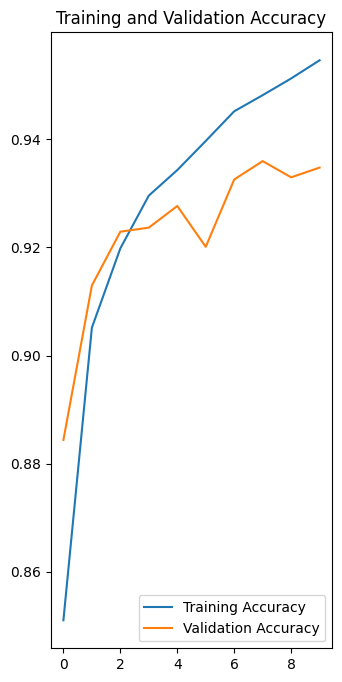

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


## Training and Validation Loss:

Depicts the loss of error in the model, the lower the loss value the better.

!0 Epochs were decided, for after testing there was no drastic difference between the use of 5 Epochs to that of 10, after anaylsis.

The use of 10 helps see the path the training and validation loss take, and it is clear that there are two instances where the model will increase its validation loss, that is around the 3 to 4 epoch range and between the 7 to 8.

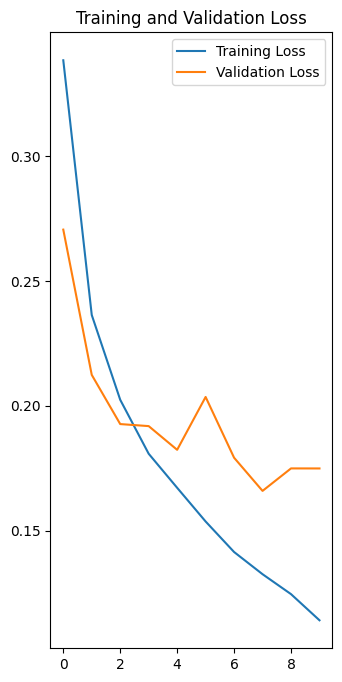

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Ensuring best weights are assigned to the model

In [ ]:
# load best weights to model
model.load_weights(weight_path)

In [ ]:
# Predicting
predictions = model.predict(test_Dataset)

625/625 [==============================] - 10s 16ms/step


In [ ]:
# Ensuring that if prediction is greater than 0.5 then 1 else 0
binary_predictions = (predictions > 0.5).astype(int)
binary_predictions

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

## Confusion Matrix

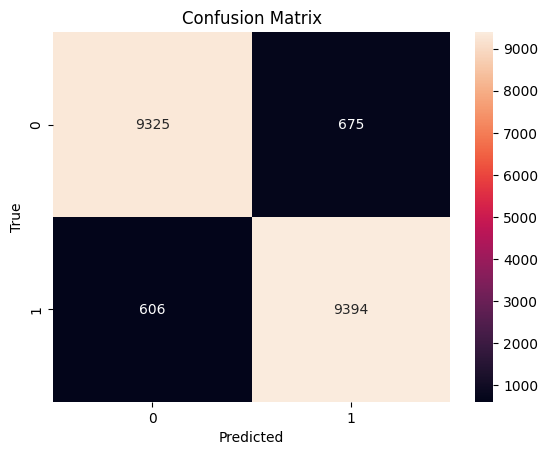

In [ ]:
from sklearn.metrics import confusion_matrix

true_labels = test_Dataset.classes

cm = confusion_matrix(true_labels, binary_predictions)

# Generate a confusion matrix
sb.heatmap(cm , annot= True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Report indicating accuracy score

In [ ]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(true_labels, binary_predictions))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10000
           1       0.93      0.94      0.94     10000

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000



## Accuracy Score Results:

The accuracy score calculated after evaluation comes to 93% for both Epochs = 5 & 10, indicating that when an image is pushed through the model, the model will have a 93% likelihood of beening correct in its classification prediction.

## Confusion Matrix Results:
---
**Epochs = 5**
* Fake and was Fake: 9349
* Fake but was Real: 651
* Real but was Fake: 715
* Real but was Real: 9285
---
**Totals:**
* Total correct = 18634
* Total incorrect = 1366
---
**Epochs = 10**
* Fake and was Fake: 9325
* Fake but was Real: 675
* Real but was Fake: 606
* Real but was Real: 9394
---
**Totals:**
* Total correct = 18719
* Total incorrect = 1281
---

## Final Evaluation:

Looking at the two version of the confusion matrix, it is clear to see that the better performing model is the model with an Epoch of 10, however the difference between the two is not drastic, but the epoch 10 model will provide an overall better classification prediction than the epoch 5 model.